# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "CF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'CF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_CF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.773  1  1.060 0.305 0.006   
                             age        0.248  1  0.340 0.561 0.002   
                             Kiel       3.004  1  4.117 0.044 0.021   
                             Magdeburg  5.481  1  7.512 0.007 0.038   
                             Sweden     8.558  1 11.728 0.001 0.058   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.079  1  0.087 0.768 0.000   
                             age        0.340  1  0.378 0.539 0.002   
                             Kiel       0.105  1  0.117 0.732 0.001   
                             Magdeburg  2.395  1  2.666 0.104 0.014   
                             Sweden    14.896  1 16.586 0.000 0.080   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.516  0.467    False  
                             age               0.251  0.701    False  
                             Kiel              1.358  0.111    False  
                             Magdeburg         2.173  0.024     True  
                             Sweden            3.123  0.004     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.115  0.860    False  
                             age               0.268  0.684    False  
                             Kiel              0.135  0.833    False  
                             Magdeburg         0.982  0.216    False  
                             Sweden            4.167  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      CF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.280  1  9.132 0.003 0.046   
                             age        0.005  1  0.038 0.845 0.000   
                             Kiel       0.274  1  1.953 0.164 0.010   
                             Magdeburg  0.417  1  2.977 0.086 0.015   
                             Sweden     1.586  1 11.312 0.001 0.056   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.885  1  3.979 0.048 0.020   
                             age        0.455  1  0.959 0.329 0.005   
                             Kiel       1.424  1  3.005 0.085 0.015   
                             Magdeburg  1.025  1  2.164 0.143 0.011   
                             Sweden    17.263  1 36.434 0.000 0.160   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.544  0.009     True  
                             age               0.073  0.898    False  
                             Kiel              0.786  0.270    False  
                             Magdeburg         1.065  0.162    False  
                             Sweden            3.031  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.323  0.100    False  
                             age               0.483  0.461    False  
                             Kiel              1.072  0.159    False  
                             Magdeburg         0.845  0.242    False  
                             Sweden            8.094  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     CF                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.003         2.544  0.009     True   
                             age       0.845         0.073  0.898    False   
                             Kiel      0.164         0.786  0.270    False   
                             Magdeburg 0.086         1.065  0.162    False   
                             Sweden    0.001         3.031  0.003     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.048         1.323  0.100    False   
                             age       0.329         0.483  0.461    False   
                             Kiel      0.085         1.072  0.159    False   
                             Magdeburg 0.143         0.845  0.242    False   
                             Sweden    0.000         8.094  0.000     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.305         0.516  0.467    False  
                             age       0.561         0.251  0.701    False  
                             Kiel      0.044         1.358  0.111    False  
                             Magdeburg 0.007         2.173  0.024     True  
                             Sweden    0.001         3.123  0.004     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.768         0.115  0.860    False  
                             age       0.539         0.268  0.684    False  
                             Kiel      0.732         0.135  0.833    False  
                             Magdeburg 0.104         0.982  0.216    False  
                             Sweden    0.000         4.167  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'CF': 'CF', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.225         3.279     0.280     0.262         2.477     0.339
std       0.293         6.240     0.320     0.304         5.363     0.332
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.000         0.406     0.002     0.004         0.336     0.015
50%       0.062         1.207     0.124     0.122         0.915     0.243
75%       0.393         3.301     0.524     0.462         2.427     0.616
max       0.999        86.891     0.999     1.000       146.795     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        CF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.003         2.544   
A0A024R0T9;K7ER74;P02655                           AD     0.034         1.466   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.323         0.491   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.255         0.594   
A0A075B6H7                                         AD     0.002         2.757   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.291         0.535   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.477         0.322   
S4R3U6                                             AD     0.048         1.323   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.009     True   
A0A024R0T9;K7ER74;P02655                           AD      0.077    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.456    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.381    False   
A0A075B6H7                                         AD      0.006     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.285    False   
Q9Y6X5                                             AD      0.422    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.158    False   
Q9Y6Y9                                             AD      0.602    False   
S4R3U6                                             AD      0.100    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.305         0.516   
A0A024R0T9;K7ER74;P02655                           AD     0.065         1.185   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.156         0.808   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.574         0.241   
A0A075B6H7                                         AD     0.176         0.754   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.052         1.287   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.393         0.405   
S4R3U6                                             AD     0.768         0.115   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.467    False  
A0A024R0T9;K7ER74;P02655                           AD      0.150    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.290    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.713    False  
A0A075B6H7                                         AD      0.317    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.238         1.604     0.298     0.254         1.400     0.338
std       0.292         1.854     0.315     0.291         1.630     0.317
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.006         0.385     0.019     0.013         0.364     0.041
50%       0.086         1.064     0.162     0.127         0.895     0.252
75%       0.412         2.189     0.541     0.432         1.893     0.591
max       0.997        19.998     0.998     0.999        21.219     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,CF,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,948,1042


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

CF                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.003         2.544  0.009   
A0A024R0T9;K7ER74;P02655                           0.034         1.466  0.077   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.323         0.491  0.456   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.255         0.594  0.381   
A0A075B6H7                                         0.002         2.757  0.006   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.285   
Q9Y6X5                                             0.291         0.535  0.422   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.158   
Q9Y6Y9                                             0.477         0.322  0.602   
S4R3U6                                             0.048         1.323  0.100   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.305   
A0A024R0T9;K7ER74;P02655                              False 0.065   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.156   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.574   
A0A075B6H7                                             True 0.176   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.052   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.393   
S4R3U6                                                False 0.768   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.516  0.467   
A0A024R0T9;K7ER74;P02655                                   1.185  0.150   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.808  0.290   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.241  0.713   
A0A075B6H7                                                 0.754  0.317   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.316   
Q9Y6X5                                                     1.287  0.126   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.182   
Q9Y6Y9                                                     0.405  0.556   
S4R3U6                                                     0.115  0.860   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
CF (no)  - PI (no)    896
CF (yes) - PI (yes)   327
CF (yes) - PI (no)    146
CF (no)  - PI (yes)    52
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


CF                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.003         2.544  0.009     True 0.305   
A0A075B6H7                   0.002         2.757  0.006     True 0.176   
A0A075B6I0                   0.001         3.118  0.003     True 0.028   
A0A075B6J9                   0.020         1.709  0.048     True 0.025   
A0A075B6R2                   0.001         2.965  0.004     True 0.533   
...                            ...           ...    ...      ...   ...   
Q9UJ14                       0.011         1.949  0.030     True 0.044   
Q9UNW1                       0.534         0.272  0.654    False 0.006   
Q9UP79                       0.000         3.803  0.001     True 0.381   
Q9UQ52                       0.001         2.873  0.005     True 0.026   
Q9Y281;Q9Y281-3              0.004         2.391  0.012     True 0.278   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.516  0.467    False       186  
A0A075B6H7                           0.754  0.317    False        91  
A0A075B6I0                           1.552  0.078    False       194  
A0A075B6J9                           1.609  0.070    False       156  
A0A075B6R2                           0.273  0.678    False       164  
...                                    ...    ...      ...       ...  
Q9UJ14                               1.359  0.110    False       169  
Q9UNW1                               2.207  0.023     True       171  
Q9UP79                               0.419  0.544    False       135  
Q9UQ52                               1.581  0.074    False       188  
Q9Y281;Q9Y281-3                      0.557  0.439    False        51  

[198 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,CF,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.009,0.467,186,CF (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.077,0.150,195,CF (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.456,0.290,174,CF (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.381,0.713,196,CF (no) - PI (no)
A0A075B6H7,0.006,0.317,91,CF (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.285,0.316,197,CF (no) - PI (no)
Q9Y6X5,0.422,0.126,173,CF (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.158,0.182,197,CF (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,CF,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P52758,0.965,0.002,119,CF (no) - PI (yes),0.963
O15197;O15197-3,0.006,0.964,104,CF (yes) - PI (no),0.957
J3KSJ8;Q9UD71;Q9UD71-2,0.000,0.950,51,CF (yes) - PI (no),0.950
P43004;P43004-2;P43004-3,0.015,0.960,89,CF (yes) - PI (no),0.946
O94898,0.001,0.930,60,CF (yes) - PI (no),0.929
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.047,0.057,197,CF (yes) - PI (no),0.010
Q9NX62,0.046,0.056,197,CF (yes) - PI (no),0.010
P00740;P00740-2,0.043,0.053,197,CF (yes) - PI (no),0.010


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_1_CF


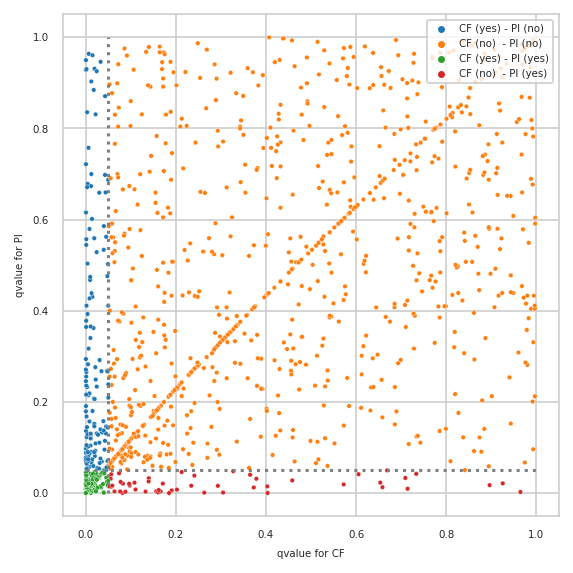

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_2_CF


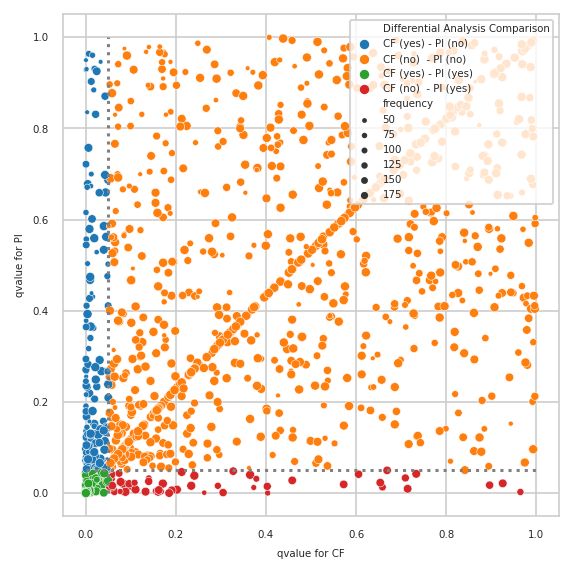

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/vaep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out